<a href="https://colab.research.google.com/github/samhithaPeddireddy/Samhitha_Info5502_Spring2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [1]:
### You code here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime



In [2]:
df1=pd.read_csv('/content/train_luc.csv', header=0)
df1.shape
#df1.head()
#df1.describe()
#pd.to_datetime(df['datetime'])
#df['datetime']


(9174, 12)

In [3]:
def hour_of_day(dt):
 return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
 


In [4]:
#deriving other parameters from the given values
dto=pd.to_datetime(df1['datetime'])

df1['Month'] = dto.dt.strftime('%m')
df1['Year'] = dto.dt.strftime('%y')
#df['day']= dto.dt.day_name()
df1['day_num']=dto.dt.dayofweek

df1['hour'] = df1['datetime'].map(hour_of_day)
df1.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,day_num,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,11,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,11,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,11,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,11,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,11,5,4


In [5]:
#calculating highest and lowest values allowed to filter outliers

print("Highest allowed",df1['count'].mean() + 3*df1['count'].std())
print("Lowest allowed",df1['count'].mean() - 3*df1['count'].std())

Highest allowed 733.6163438168348
Lowest allowed -352.4528382576459


In [6]:
#taking dataset by excluding outlier values
df = df1[(df1['count'] < 733.6163438168348) & (df1['count'] > -352.4528382576459)]
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,day_num,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,01,11,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01,11,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,01,11,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,01,11,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,01,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109,12,12,6,19
9170,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122,12,12,6,20
9171,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106,12,12,6,21
9172,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89,12,12,6,22


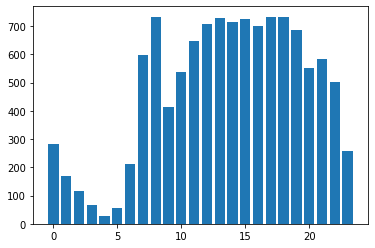

In [8]:
plt.bar(df['hour'],df['count'])
plt.show()

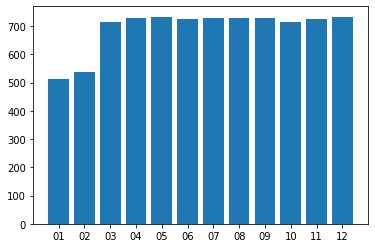

In [9]:
#plt.plot(df['atemp'],df['count'])
plt.bar(df['Month'],df['count'])
plt.show()

In [10]:
#cols = ['hour'] # clearly a simple model
# try more features later, like...
cols=['hour','temp','Month','season','workingday']
#cols =['hour','holiday','workingday','weather','temp','humidity','windspeed','Month','Year','day_num','season']

# pick your model (you should consider adjusting optional parameters too)
# reading in a few models we can pick from (there are many others)


In [43]:
#kfold for
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df[cols]
print(X)
X = preprocessing.scale(X) 
y = df['count'].values
y = preprocessing.scale(y) 
casual=df['casual'].values
casual= preprocessing.scale(casual)
registered=df['registered'].values
registered= preprocessing.scale(registered)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
X_train_cas,X_test_cas,y_train_cas,y_test_cas = train_test_split(X,casual,test_size=0.2,random_state=0)
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X,registered,test_size=0.2,random_state=0)

#kf = KFold(n_splits = 50)
#for train_index, test_index in kf.split(X):
    #print("train index",train_index)
    #print("test index",test_index)
    #print("input train",X[train_index])
    #print("input test",X[test_index])
    #print("count train",y[train_index])
    #print("count test",y[test_index])
    #X_train = X[train_index]
    #X_test = X[test_index]
    #y_train = y[train_index]
    #y_test = y[test_index]

    

    #Train the model
    #model.fit(X_train, y_train) #Training the model
    #pred_count = model.predict(X_test)
    #rms = np.sqrt(mean_squared_error(y_test,pred_count))
    #print("RMS error:",rms)






      hour   temp Month  season  workingday
0        0   9.84    01       1           0
1        1   9.02    01       1           0
2        2   9.02    01       1           0
3        3   9.84    01       1           0
4        4   9.84    01       1           0
...    ...    ...   ...     ...         ...
9169    19  14.76    12       4           0
9170    20  15.58    12       4           0
9171    21  14.76    12       4           0
9172    22  16.40    12       4           0
9173    23  14.76    12       4           0

[9053 rows x 5 columns]


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


#reference from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
paramters = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500, 1000]
}



# Create a based model
rfr = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = paramters, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 432 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 120,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

# pick one by commenting/uncommenting
#model = DecisionTreeRegressor()
#model = LinearRegression()
#model = KNeighborsRegressor(n_neighbors = 5)
#model = svm.LinearSVR()
#model = RandomForestRegressor(max_depth=20,n_estimators = 1000 )
model = RandomForestRegressor(max_depth=120,n_estimators = 500 , max_features=3, min_samples_leaf=3,min_samples_split=8 )
print("columns being used:",cols)
print(model) # to get an idea of parameters and confirm model chosen

columns being used: ['hour', 'temp', 'Month', 'season', 'workingday']
RandomForestRegressor(max_depth=120, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=500)


RMS error: 0.4285380076071533
RMS error for casual: 0.9842522064895873
RMS error for registered: 0.464282161444859


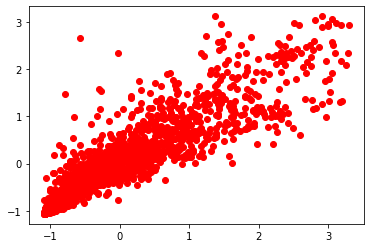

In [66]:
# fit the model to the training subset of original training data
model.fit(X_train, y_train)
model.fit(X_train_cas, y_train_cas)
model.fit(X_train_reg, y_train_reg)
pred_count = model.predict(X_test)
pred_casual = model.predict(X_test_cas)
pred_resgistered = model.predict(X_test_reg)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rms = np.sqrt(mean_squared_error(y_test,pred_count))
print("RMS error:",rms)

rms_cas=np.sqrt(mean_squared_error(y_test_cas,pred_casual))
print("RMS error for casual:",rms_cas)

rms_reg=np.sqrt(mean_squared_error(y_test_reg,pred_resgistered))
print("RMS error for registered:",rms_reg)

plt.scatter(y_test,pred_count,c='red')
plt.show()


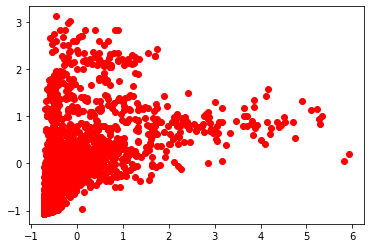

In [68]:
plt.scatter(y_test_cas,pred_casual,c='red')
plt.show()

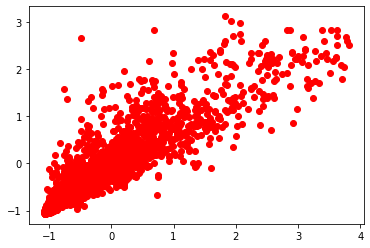

In [69]:
plt.scatter(y_test_reg,pred_resgistered,c='red')
plt.show()

In [19]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_num,hour
season,1.000000,0.054947,-0.029284,0.005991,0.289691,0.301101,0.199730,-0.148402,0.126921,0.168822,0.175727,0.010273,-0.007751
holiday,0.054947,1.000000,-0.260715,-0.025411,0.029808,0.024079,0.008689,0.010932,0.064503,-0.002379,0.017078,-0.198774,0.001380
workingday,-0.029284,-0.260715,1.000000,0.028122,-0.000083,-0.003833,-0.037516,0.019202,-0.332109,0.093022,-0.021764,-0.696733,-0.003741
weather,0.005991,-0.025411,0.028122,1.000000,-0.053839,-0.052934,0.408849,0.015226,-0.131447,-0.112080,-0.130582,-0.026125,-0.017643
temp,0.289691,0.029808,-0.000083,-0.053839,1.000000,0.992386,-0.057082,-0.010830,0.473089,0.308747,0.392455,-0.029066,0.136789
atemp,0.301101,0.024079,-0.003833,-0.052934,0.992386,1.000000,-0.036087,-0.050925,0.472465,0.308129,0.391764,-0.025824,0.131995
humidity,0.199730,0.008689,-0.037516,0.408849,-0.057082,-0.036087,1.000000,-0.308085,-0.345134,-0.275576,-0.327540,-0.002830,-0.277985
windspeed,-0.148402,0.010932,0.019202,0.015226,-0.010830,-0.050925,-0.308085,1.000000,0.106307,0.103998,0.116547,-0.031992,0.146693
casual,0.126921,0.064503,-0.332109,-0.131447,0.473089,0.472465,-0.345134,0.106307,1.000000,0.500779,0.705179,0.247849,0.295472
registered,0.168822,-0.002379,0.093022,-0.112080,0.308747,0.308129,-0.275576,0.103998,0.500779,1.000000,0.966857,-0.064116,0.386234


In [58]:
#feature importance
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [59]:
print("Feature ranking:")

for f in range(df[cols].shape[1]):
    print("%d. feature %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hour (0.697526)
2. feature temp (0.114925)
3. feature workingday (0.096613)
4. feature Month (0.071216)
5. feature season (0.019720)


In [78]:
test_df = pd.read_csv('/content/test_luc.csv', header=0)
sample_df=pd.read_csv('/content/sample_output.csv')
print("\nNumber of samples:",test_df.shape[0] ,"and number of features:",test_df.shape[1],"\n")
dto1=pd.to_datetime(df['datetime'])
# must add that new feature into the test data too, to use it in prediction
test_df['hour'] = test_df['datetime'].map(hour_of_day)
test_df['Month'] = dto1.dt.strftime('%m')
test_df['Year'] = dto1.dt.strftime('%y')
test_df['day_num']=dto1.dt.dayofweek
# show the test data output to be sure it read in correctly and added the column
test_df.head()

# fit the selected model TO YOUR FULL TRAINING SET
model.fit( df[cols], df['count'])
model.fit(df[cols], df['casual'])
model.fit(df[cols], df['registered'])

# apply to the test data FOR WHICH YOU DON'T HAVE THE ANSWERS
# (not the "test set" you used for model selection and tuning)
pred_count = model.predict(test_df[cols])
casual_count=model.predict(test_df[cols])
registered_count=model.predict(test_df[cols])


# add the prediction column (in case you want to inspect it later)
test_df['casual']=casual_count
test_df['registered']=registered_count
test_df['count'] = pred_count
test_df['added_predict_count']=test_df['casual']+test_df['registered']

print(test_df)

rms1 = np.sqrt(mean_squared_error(sample_df['count'],test_df['count']))
print("RMS error:",rms1)

rms_added=np.sqrt(mean_squared_error(sample_df['count'],test_df['added_predict_count']))
print("RMS error taken by adding:",rms_added)

normalized_rmse=rms1/(test_df['count'].max()-test_df['count'].min())
print("normalized_rmse is :", normalized_rmse)


# save the predicted count as a csv with a header column and datetime row
test_df = test_df[['datetime','count']].to_csv('my_prediction.csv', 
    index=False, header=True)

print("Prediction complete. Saved as my_prediction.csv")


Number of samples: 1712 and number of features: 9 

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-17 00:00:00       1        1           0        2   8.20   
1     2011-01-17 01:00:00       1        1           0        2   8.20   
2     2011-01-17 02:00:00       1        1           0        2   7.38   
3     2011-01-17 03:00:00       1        1           0        2   7.38   
4     2011-01-17 04:00:00       1        1           0        2   7.38   
...                   ...     ...      ...         ...      ...    ...   
1707  2012-12-19 19:00:00       4        0           1        1  15.58   
1708  2012-12-19 20:00:00       4        0           1        1  14.76   
1709  2012-12-19 21:00:00       4        0           1        1  13.94   
1710  2012-12-19 22:00:00       4        0           1        1  13.94   
1711  2012-12-19 23:00:00       4        0           1        1  13.12   

       atemp  humidity  windspeed  hour Month Year  day_nu